In [4]:
#Importation des bibiotheques importants

import numpy as np 
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from importlib import reload
reload(np)

/opt/conda/lib/python3.7/importlib/__init__.py:169: UserWarning: The NumPy module was reloaded (imported a second time). This can in some cases result in small but subtle issues and is discouraged.
  _bootstrap._exec(spec, module)


<module 'numpy' from '/opt/conda/lib/python3.7/site-packages/numpy/__init__.py'>

In [5]:
#initialiser des valeur qu'on va les utiliser
L=10
T0=0
TL=5
N=20

In [6]:
#une fonction pour gerer la matrice A
def generate_A(N):
    #produire une matrice de zeros d'ordre N
    A=np.zeros((N,N))
    #remplir la diagonal la matrice par 2
    for i in range(N):
        A[i,i]=2
    #remplir les element proches de la diagonale par -1
    for i in range(1,N-1):
        A[i,i+1]=-1
        A[i,i-1]=-1
    A[0,1]=-1
    A[N-1,N-2]=-1
    return A

In [7]:
#une fonction pour gerer la matrice B
def generate_B(N):
    #produire une colonne de zeros d'ordre N
    B=np.zeros((N,))
    #cree la colonne avec des valeurs aleatoires
    B=np.random.choice(10,N,replace=True)
    #ajouter des constantes pour B[0] et B[N]
    B[0]+=(T0/((L/N)**2))
    B[N-1]+=(TL/((L/N)**2))
    B=B*((L/N)**2)
    return B


In [8]:
A=generate_A(1000)
print(A)

[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


In [6]:
B=generate_B(N)
print(B)

[2.25 1.5  1.75 0.   0.75 0.5  1.75 1.5  0.5  0.5  1.75 0.75 2.   2.
 1.25 1.5  0.5  1.   1.   5.5 ]


In [7]:
#alpha dans le domaine [0,0.503[ car :
#cette fonction calcule les valeur propres d'une matrice
print(np.linalg.eigvals(A))
he=max(np.linalg.eigvals(A))
print(he)
print(2/he)

[3.97766165 3.91114561 3.80193774 3.65247755 3.46610374 3.2469796
 3.         2.73068205 2.44504187 2.14946019 1.85053981 1.55495813
 1.26931795 0.02233835 0.08885439 0.19806226 0.34752245 0.53389626
 0.7530204  1.        ]
3.977661652450256
0.5028079748230954


In [17]:
X = np.linalg.solve(A, B)
print(X)


[12.46428571 22.67857143 31.39285714 38.35714286 45.32142857 51.53571429
 57.25       61.21428571 63.67857143 65.64285714 67.10714286 66.82142857
 65.78571429 62.75       57.71428571 51.42857143 43.64285714 35.35714286
 26.07142857 15.78571429]


In [9]:
"""def calcul_gradient(A,B,X,alpha,num_iter=0):
    
    while(((np.dot(A,X)-B)).any() != 0.2):
        X=X-alpha*(np.dot(A,X)-B)
        num_iter+=1
        
    return X,num_iter

#====================================================================    
X=np.full((N,),100)
alpha=0.2
print(calcul_gradient(A,B,X,alpha,num_iter=0))
"""

'def calcul_gradient(A,B,X,alpha,num_iter=0):\n    \n    while(((np.dot(A,X)-B)).any() != 0.2):\n        X=X-alpha*(np.dot(A,X)-B)\n        num_iter+=1\n        \n    return X,num_iter\n\n#====================================================================    \nX=np.full((N,),100)\nalpha=0.2\nprint(calcul_gradient(A,B,X,alpha,num_iter=0))\n'

In [10]:
def calcul_gradient1(A,B,X,alpha,num_iter=100000):
    for i in range(num_iter):
        #update du valeur de X dans chaque iteration
        X = X-alpha*(np.dot(A,X)-B)
    return X

X=np.zeros((N,))
alpha=0.5

print(calcul_gradient1(A,B,X,alpha))

[12.46428571 22.67857143 31.39285714 38.35714286 45.32142857 51.53571429
 57.25       61.21428571 63.67857143 65.64285714 67.10714286 66.82142857
 65.78571429 62.75       57.71428571 51.42857143 43.64285714 35.35714286
 26.07142857 15.78571429]


In [11]:
S=(np.dot(A,calcul_gradient1(A,B,X,alpha))-B)
print(S)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[-0.18950103 -0.36952453 -0.53242333 -0.67364567 -0.79209379 -0.88956781
 -0.96957438 -1.03591282 -1.09141749 -1.13709673 -1.17174983 -1.1920251
 -1.19282811 -1.16799387 -1.11117515 -1.01692678 -0.88193583 -0.70624269
 -0.49415953 -0.25452156]
======================== -0.18950102586590223
[-0.02467062 -0.04879088 -0.07182266 -0.09325202 -0.11260063 -0.12943646
 -0.14338335 -0.15412949 -0.16143435 -0.16513413 -0.16514546 -0.16146734
 -0.15418121 -0.14344921 -0.12951059 -0.11267646 -0.0933228  -0.07188211
 -0.04883372 -0.02469303]
======================== -0.0246706188525323
[-0.01973601 -0.03903146 -0.05745559 -0.07459708 -0.09007316 -0.10353819
 -0.11469136 -0.12328342 -0.12912223 -0.13207712 -0.13208178 -0.1291358
 -0.12330468 -0.11471844 -0.10356867 -0.09010434 -0.07462619 -0.05748004
 -0.03904907 -0.01974523]
======================== -0.01973601126708502
[-1.42108547e-14 -2.84217094e-14 -3.55271368e-14 -7.10542736e-14
 -7.10542736e-14 -7.10542736e-14 -7.10542736e-14 -7.10542736e-14


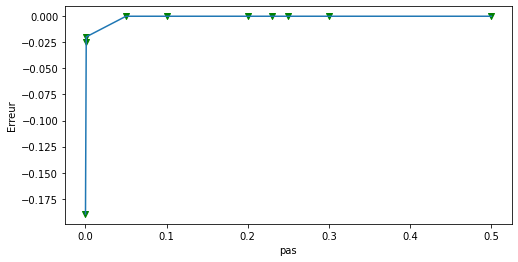

In [12]:
#alp est une liste qui contient des differntes valeurs du pas
alp=[0.0001,0.001,0.0011,0.05,0.1,0.2,0.23,0.25,0.3,0.5]
D=[]
for i in range(len(alp)):
    # S represente l'erreur
    S=(np.dot(A,calcul_gradient1(A,B,X,alp[i]))-B)
    
    D.append(max(S))
    print(S)
    print("========================",max(S))
plt.figure(figsize=(8,4))
plt.scatter(alp,D,marker='v',color='g')
plt.plot(alp,D)
plt.xlabel("pas")
plt.ylabel('Erreur')
plt.show()

In [13]:
#petite fonction qui calcule le gradient
def gradF(W):
    return(np.dot(A,W)-B)
#fonction du calcul du gradient
#tol est une valeur proche de zero pour s'eloigne d'une boucle infini
def gradientPasConstant ( gradF , x0 , tau , tol =1e-7 , Niter =1000) :
    #initialisation des parametres 
    xn , L = x0 , []
    for n in range ( Niter ) :
        gradFxn = gradF ( xn )
        #si la norme est inferier a tol on stop
        if LA.norm ( gradFxn ) < tol :
            return xn,n
        L.append(xn)
        #sinon update X
        xn = xn - tau * gradFxn
    print (" The algorithm didn't converge after ", Niter , " iterations ")
    

In [18]:
x0=np.zeros((N,))

tau=0.5
print(gradientPasConstant ( gradF , x0 , tau , tol =1e-7 , Niter =10000000))




(array([12.46428551, 22.67857102, 31.39285655, 38.35714208, 45.32142764,
       51.53571321, 57.24999881, 61.21428444, 63.67857009, 65.64285577,
       67.10714149, 66.82142723, 65.78571301, 62.74999881, 57.71428464,
       51.42857049, 43.64285637, 35.35714226, 26.07142817, 15.78571408]), 1579)


In [15]:
G=(np.dot(A,gradientPasConstant ( gradF , x0 , tau , tol =1e-7 , Niter =1000000))-B)
print(G)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: shapes (20,20) and (2,) not aligned: 20 (dim 1) != 2 (dim 0)

In [ ]:
#alpha liste contient plusieurs valeurs de pas 
alpha=np.arange(0.1, 0.5, 0.03, dtype=float)
print(alpha)
#ous liste pour enregistrer les valeurs du nombres d'iterations
OUS=[]
x0=np.zeros((N,))
for i in range(len(alpha)):
    # n est la deuxieme valeur de sortie de la fonction d'ou elle prend l'indice 1
    n=gradientPasConstant ( gradF , x0 , alpha[i] , tol =1e-7 , Niter =1000000)[1]
    #print(X)
    OUS.append(n)
print(OUS)
plt.figure(figsize=(10,5))
plt.scatter(alpha,OUS,color='r',marker='x')
plt.plot(alpha,OUS)
plt.xlabel("Alpha")
plt.ylabel("Nombres d'iterations")
plt.show()

In [ ]:
alp=[0.0001,0.0001145,0.0003,0.0009,0.0027,0.0071,0.01,0.25,0.3,0.5]
D=[]
for i in range(len(alp)):
    if ((gradientPasConstant ( gradF , x0 , alp[i] , tol =1e-17 , Niter =1000000)-B).type()!=str):
        S=(np.dot(A,gradientPasConstant ( gradF , x0 , alp[i] , tol =1e-17 , Niter =1000000)-B))
        D.append(max(S))
        print(S)
        print("========================",max(S))

plt.figure(figsize=(20,10))
plt.plot(alp,D,marker='o',color='blue')
plt.show()
"""S=(np.dot(A,gradientPasConstant ( gradF , x0 , alp[i] , tol =1e-6 , Niter =1550))-B)
    D.append(max(S))
    print(S)
    print("========================",max(S))"""

#  ***ALGORITHME GRADIENT DESCENT A PAS OPTIMAL***
#  

In [19]:
#fonction pour calculer le gradient
def gradF1(A,X,B):
    return(np.dot(A,X)-B)
print (gradF1(A,X,B))
#fonction pour calculer la valeur de pas optimal en prenant A,B et X comme paramétres
def pas_opt_new(A,X,B):
    alpha_opt = 0
    #calcul de norme 2 du gradient
    norm_2 = LA.norm(gradF1(A,X,B)) ** 2
    #calcul de norme A du gradient
    norm_A = (np.sqrt(np.dot(np.dot(A,gradF1(A,X,B)),gradF1(A,X,B)))) ** 2
    alpha_opt = norm_2 / norm_A
    return alpha_opt
#exemple N=20
print(pas_opt_new(A,X,B))

[ 0.00000000e+00  0.00000000e+00 -7.10542736e-15  0.00000000e+00
  1.42108547e-14  0.00000000e+00  0.00000000e+00 -1.42108547e-14
  1.42108547e-14  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
0.38235294117647056


In [20]:
def calcul_gradient_opt(A,B,X,pas_optnew,tol=10e-7,num_iter=1000):
    for i in range(num_iter):
        #calcul de gradient 
        gradFxn = gradF1(A,X,B)
        #si la norme est inferier a tol on stop
        if LA.norm ( gradFxn ) < tol :
            return X,i
        #sinon on calcul le pas optimal
        pas=pas_opt_new(A,X,B)
        #on update le X
        X-= pas*(gradFxn)
    print (" Erreur , l’algorithme n’a pas convergé après ", num_iter , " itérations ")
#exemple pour N=15
A4=generate_A(20)
B4=generate_B(20)
X4=np.zeros(20)
print(calcul_gradient_opt(A4,B4,X4,pas_opt_new,tol=10e-7,num_iter=100000))

(array([17.22222088, 34.44444185, 51.22221839, 65.33332854, 75.44443871,
       82.44443818, 86.33332657, 87.99999322, 85.6666599 , 80.66666041,
       72.99999427, 61.33332854, 48.77777395, 36.22221963, 22.33333199]), 832)


In [26]:
A4=generate_A(20)
B4=[2.25 ,1.5,  1.75, 0. ,  0.75 ,0.5 , 1.75 ,1.5,  0.5,  0.5,  1.75, 0.75, 2.,   2., 1.25, 1.5 , 0.5,  1.,   1.,   5.5 ]
X4=np.zeros((20,))
print(calcul_gradient_opt(A4,B4,X4,pas_opt_new,tol=10e-7,num_iter=100000))

(array([12.46428412, 22.67856831, 31.39285251, 38.3571369 , 45.32142131,
       51.53570601, 57.24999075, 61.21427586, 63.67856102, 65.64284659,
       67.10713221, 66.82141825, 65.78570434, 62.74999083, 57.71427736,
       51.42856423, 43.64285113, 35.35713827, 26.07142542, 15.78571271]), 1340)


In [ ]:
"""
X=np.ones((20,))
pas=pas_opt(A,X,B)
print(calcul_gradient1(A,B,X,pas_opt,num_iter=100000))
"""
#liste des differentes N
NM=np.arange(2,100,10,dtype=int)
print(NM)
AY=[]
for i in NM:
    #generer A,B,X pour chaque N
    Am=generate_A(i)
    Bm=generate_B(i)
    Xm=np.zeros((i,))
    #on calcule le pas optimal 
    pas = pas_opt_new(Am,Xm,Bm)
    #on calcule le gradient a pas optimal pour chaque N
    n=calcul_gradient_opt(Am , Bm , Xm , pas , num_iter=100000 )[1]
    #on ajoute le nombre d'iteration dans la liste AY
    AY.append(n)
print(AY)


In [ ]:
print(AY)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(NM,AY,color='r',marker='X')
plt.plot(NM,AY)
plt.xlabel("taille de la matrice")
plt.ylabel("Nombre d'iterations")
plt.show()

### """S=(np.dot(A,calcul_gradient1(A,B,X,alpha_opt))-B)
print(S)
[ 63.95238095 118.9047619  166.85714286 207.80952381 242.76190476
 268.71428571 287.66666667 299.61904762 306.57142857 307.52380952
 301.47619048 295.42857143 280.38095238 264.33333333 239.28571429
 209.23809524 175.19047619 139.14285714 102.0952381   63.04761905]
"""

In [ ]:
M=[[5,1650],[10,1953],[15,2004],[20,2708],[64,3100],[128,8025],[256,30170],[512,71149]]
L1,L2=[],[]
print(M[i][0])
for i in range(len(M)):
    L1.append(M[i][0])
    L2.append(M[i][1])
plt.figure(figsize=(10,10))
plt.plot(L1,L2,marker='X',color='r')

# # **ALGORITHME GRADIENT DESCENT CONJUGUE**

In [ ]:
def beta(A, G, Z):
     norm_A = np.dot(np.dot(A, G), Z)    
     norm = np.dot(np.dot(A, Z), Z)
     return norm_A /norm 
def calcul_pas(A, G , d ):
     norm_2 = LA.norm(np.dot(d ,G) )
     norm_A = np.dot(np.dot(A,d),d)        
     return ( - norm_2 /norm_A )
def gradient_conjugué(A, B, X, tol =1e-6 , Niter =1000):
    d0 = - gradF1(A,X,B)
    norm_2 = LA.norm(d0) ** 2 
    norm_A = (np.dot(np.dot(A,d0),d0))
    p0 = norm_2 / norm_A
    x1 = x0 + p0 * d0  
    Xd = [x1]
    DL = [d0]              
    for k in range ( Niter ) :
        gradFxk = gradF1(A,Xd[-1],B)  
        if LA.norm ( gradFxk ) < tol :
            return ( Xd[-1] ) 
        bk = beta(A, gradFxk, DL[-1] )   
        dk = -gradFxk + bk * ( DL[-1] )
        pk= calcul_pas(A, gradF1(A,X,B), dk )    
        xkp = Xd[-1] + pk * dk
        Xd.append(xkp)
        DL.append(dk) 
    print (" Erreur , l’algorithme n’a pas convergé après ", Niter , " itérations ")
X=np.ones((20,))

print(gradient_conjugué(A, B, X, tol =1e-6 , Niter =10000000))

In [29]:
def gradientConjugue (A , b , tol =1e-6) :
    d = len ( b )
    xn , pn , grad, L = np.zeros ( d ) , b , b , [] # Initialisation
    for n in range ( d +2) :
        if LA.norm ( grad ) < tol : # Condition de sortie " usuelle "
            return xn ,n
        L . append ( xn )
        Apn = np.dot (A , pn ) #une seule multiplication matrice / vecteur
        alphan = np.dot ( grad , grad ) / np.dot ( pn , Apn )
        #double affectation
        xn , rnp1 = xn + alphan * pn , grad - alphan * Apn
        #mise a jour de beta
        pn , grad = rnp1 + np.dot ( rnp1 , rnp1 ) / np.dot ( grad , grad ) * pn , rnp1
    print (" Probleme , l’algorithme n’a pas convergé après ",n ," itérations ")
print(gradientConjugue (A , B , tol =1e-6))
A6=generate_A(20)
B6=[2.25 ,1.5,  1.75, 0. ,  0.75 ,0.5 , 1.75 ,1.5,  0.5,  0.5,  1.75, 0.75, 2.,   2., 1.25, 1.5 , 0.5,  1.,   1.,   5.5 ]
print(gradientConjugue (A6 , B6 , tol =1e-6)[1])


(array([12.46428571, 22.67857143, 31.39285714, 38.35714286, 45.32142857,
       51.53571429, 57.25      , 61.21428571, 63.67857143, 65.64285714,
       67.10714286, 66.82142857, 65.78571429, 62.75      , 57.71428571,
       51.42857143, 43.64285714, 35.35714286, 26.07142857, 15.78571429]), 20)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [31]:
print(gradientConjugue (A , B , tol =1e-6))


(array([12.46428571, 22.67857143, 31.39285714, 38.35714286, 45.32142857,
       51.53571429, 57.25      , 61.21428571, 63.67857143, 65.64285714,
       67.10714286, 66.82142857, 65.78571429, 62.75      , 57.71428571,
       51.42857143, 43.64285714, 35.35714286, 26.07142857, 15.78571429]), 20)


In [ ]:
BS=[]
for i in NM:
    #generer A,B,X pour chaque N
    An=generate_A(i)
    bn=generate_B(i)
    #on calcule le gradient a pas optimal pour chaque N
    n=gradientConjugue (An , bn , tol =1e-6)[2]
    #on ajoute le nombre d'iteration dans la liste BS
    BS.append(n)
print(BS)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(NM,BS,color='r',marker='o')
plt.plot(NM,BS,color='g')
plt.xlabel("taille de la matrice")
plt.ylabel("Nombre d'iterations")
plt.show()